# Movie Recommender System

### Import Libraries 

In [1]:
import pandas as pd
import numpy as np

### Import the movies dataset

In [2]:
movie_df = pd.read_csv("C:/Datasets/movies.csv")

In [3]:
rating_df = pd.read_csv("C:/Datasets/ratings.csv")

### Checking the tables 

In [4]:
movie_df.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [5]:
rating_df.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


### Now combine the two tables and drop things we dont have to use

In [6]:
data = pd.merge(rating_df, movie_df, on='movieId')
data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [7]:
columns = ['timestamp', 'genres']
data = data.drop(columns, axis=1)
data.head(10)

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)
5,18,1,3.5,Toy Story (1995)
6,19,1,4.0,Toy Story (1995)
7,21,1,3.5,Toy Story (1995)
8,27,1,3.0,Toy Story (1995)
9,31,1,5.0,Toy Story (1995)


In [8]:
data = data.dropna(axis = 0, subset = ['title'])
data

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)
...,...,...,...,...
100831,610,160341,2.5,Bloodmoon (1997)
100832,610,160527,4.5,Sympathy for the Underdog (1971)
100833,610,160836,3.0,Hazard (2005)
100834,610,163937,3.5,Blair Witch (2016)


# EDA

Let's explore the data and look at some of the best rated movie.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
data.groupby("title")["rating"].mean().sort_values(ascending=False)


title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
                                                ... 
The Beast of Hollow Mountain (1956)              0.5
Follow Me, Boys! (1966)                          0.5
The Butterfly Effect 3: Revelations (2009)       0.5
The Emoji Movie (2017)                           0.5
Rust and Bone (De rouille et d'os) (2012)        0.5
Name: rating, Length: 9719, dtype: float64

In [11]:
data.groupby("title")["rating"].count().sort_values(ascending=False).head()



title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [12]:
data

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)
...,...,...,...,...
100831,610,160341,2.5,Bloodmoon (1997)
100832,610,160527,4.5,Sympathy for the Underdog (1971)
100833,610,160836,3.0,Hazard (2005)
100834,610,163937,3.5,Blair Witch (2016)


In [13]:
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [14]:
ratings['number of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())
ratings.head()

,rating,number of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


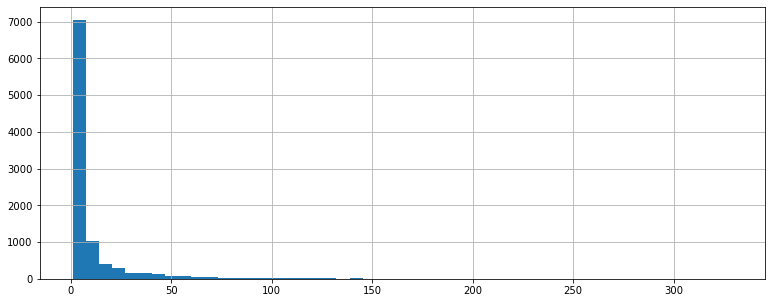

In [15]:
plt.figure(figsize=(13,5))
ratings["number of ratings"].hist(bins=50)

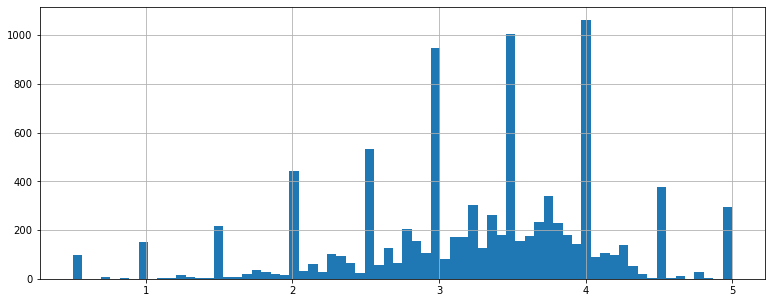

In [16]:
plt.figure(figsize=(13,5))
ratings["rating"].hist(bins=70)

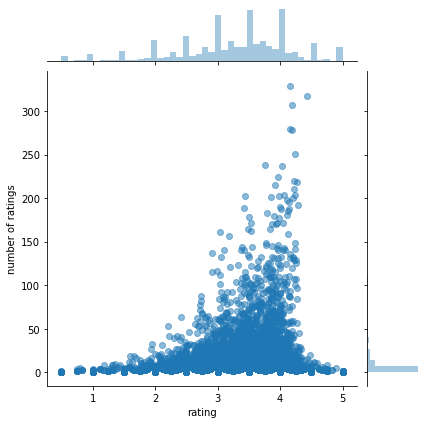

In [17]:
sns.jointplot(x="rating",y="number of ratings",data=ratings,alpha=0.5)

In [18]:
data

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)
...,...,...,...,...
100831,610,160341,2.5,Bloodmoon (1997)
100832,610,160527,4.5,Sympathy for the Underdog (1971)
100833,610,160836,3.0,Hazard (2005)
100834,610,163937,3.5,Blair Witch (2016)


In [19]:
ratings

,rating,number of ratings
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
...,...,...
eXistenZ (1999),3.863636,22
xXx (2002),2.770833,24
xXx: State of the Union (2005),2.000000,5


# Recommending Similar Movies 

Now let's create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [20]:
user_rating = data.drop_duplicates(['userId','title'])
user_rating.head(10)

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)
5,18,1,3.5,Toy Story (1995)
6,19,1,4.0,Toy Story (1995)
7,21,1,3.5,Toy Story (1995)
8,27,1,3.0,Toy Story (1995)
9,31,1,5.0,Toy Story (1995)


In [21]:
moviemat = data.pivot_table(index='userId',columns='title',values='rating').fillna(0)
moviemat.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
ratings.sort_values('number of ratings',ascending=False).head(10)

,rating,number of ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [23]:
ratings.head()

,rating,number of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


In [32]:
forrestgump_user_ratings = moviemat['Forrest Gump (1994)']
jurassicpark_user_ratings = moviemat['Jurassic Park (1993)']
forrestgump_user_ratings.head()

userId
1    4.0
2    0.0
3    0.0
4    0.0
5    0.0
Name: Forrest Gump (1994), dtype: float64

In [25]:
similar_to_forrestgump = moviemat.corrwith(forrestgump_user_ratings)
similar_to_jurassicpark = moviemat.corrwith(jurassicpark_user_ratings)

In [26]:
corr_forrestgump = pd.DataFrame(similar_to_forrestgump,columns=['Correlation'])
corr_forrestgump.dropna(inplace=True)
corr_forrestgump.head()

,Correlation
title,
'71 (2014),0.014126
'Hellboy': The Seeds of Creation (2004),0.042224
'Round Midnight (1986),0.000109
'Salem's Lot (2004),-0.042070
'Til There Was You (1997),-0.019184


In [27]:
corr_forrestgump.sort_values('Correlation',ascending=False).head(10)


,Correlation
title,
Forrest Gump (1994),1.000000
Jurassic Park (1993),0.453632
Mrs. Doubtfire (1993),0.440460
"Shawshank Redemption, The (1994)",0.411180
Apollo 13 (1995),0.390374
Pretty Woman (1990),0.390179
Braveheart (1995),0.374274
Pulp Fiction (1994),0.373776
"Lion King, The (1994)",0.358141


In [28]:
corr_forrestgump = corr_forrestgump.join(ratings['number of ratings'])
corr_forrestgump.head()

,Correlation,number of ratings
title,,
'71 (2014),0.014126,1
'Hellboy': The Seeds of Creation (2004),0.042224,1
'Round Midnight (1986),0.000109,2
'Salem's Lot (2004),-0.042070,1
'Til There Was You (1997),-0.019184,2


In [48]:
corr_forrestgump[corr_forrestgump['number of ratings']>100].sort_values('Correlation',ascending=False).head()


,Correlation,number of ratings
title,,
Forrest Gump (1994),1.000000,329
Jurassic Park (1993),0.453632,238
Mrs. Doubtfire (1993),0.440460,144
"Shawshank Redemption, The (1994)",0.411180,317
Apollo 13 (1995),0.390374,201


In [30]:
corr_jurassicpark = pd.DataFrame(similar_to_jurassicpark,columns=['Correlation'])
corr_jurassicpark.dropna(inplace=True)
corr_jurassicpark = corr_jurassicpark.join(ratings['number of ratings'])
corr_jurassicpark[corr_jurassicpark['number of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,number of ratings
title,,
Jurassic Park (1993),1.000000,238
Terminator 2: Judgment Day (1991),0.563089,224
Speed (1994),0.513619,171
"Fugitive, The (1993)",0.505198,190
Braveheart (1995),0.476001,237


# Model Create

In [36]:
X = moviemat.values.T
X.shape

(9719, 610)

## Now lets fit the model

In [37]:
import sklearn
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=12, random_state=17)
matrix = SVD.fit_transform(X)
matrix.shape

(9719, 12)

In [38]:
import warnings
warnings.filterwarnings("ignore",category =RuntimeWarning)
corr = np.corrcoef(matrix)
corr.shape

(9719, 9719)

## Now lets check the results¶

In [39]:
movie_title = moviemat.columns
movie_title_list = list(movie_title)
coffey_hands = movie_title_list.index("Forrest Gump (1994)")

In [43]:
corr_coffey_hands  = corr[coffey_hands]
list(movie_title[(corr_coffey_hands >= 0.9)])

['Apollo 13 (1995)',
 'Braveheart (1995)',
 'Dances with Wolves (1990)',
 'Forrest Gump (1994)',
 'Jurassic Park (1993)',
 'Philadelphia (1993)',
 'Pulp Fiction (1994)',
 "Schindler's List (1993)",
 'Seven (a.k.a. Se7en) (1995)',
 'Shawshank Redemption, The (1994)',
 'Silence of the Lambs, The (1991)',
 'Toy Story (1995)',
 "What's Eating Gilbert Grape (1993)"]